<a href="https://colab.research.google.com/github/Lill98/train-object-detection-in-yolo/blob/master/Yolo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This cell imports the drive library and mounts your Google Drive as a VM local drive. You can access to your Drive files 
# using this path "/content/gdrive/My Drive/"

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!ls -la "/content/gdrive/My Drive/darknet"

total 42
drwx------ 2 root root 4096 May 22 03:24 backup
drwx------ 2 root root 4096 May 21 02:38 bin
drwx------ 2 root root 4096 May 22 03:14 cfg
drwx------ 2 root root 4096 May 22 03:25 check
-rw------- 1 root root 3941 May 30 15:51 convert_file.py
drwx------ 2 root root 4096 May 21 01:58 cuDNN
-rw------- 1 root root  909 May 30 03:31 draw_box.py
drwx------ 2 root root 4096 May 22 03:38 img
-rw------- 1 root root  235 May 30 16:04 obj.data.txt
-rw------- 1 root root    4 May 27 17:31 obj.names.txt
drwx------ 2 root root 4096 May 29 10:20 test_data
drwx------ 2 root root 4096 May 29 10:14 train_data
drwx------ 2 root root 4096 May 22 03:36 weights


In [ ]:
# This cell can be commented once you checked the current CUDA version
# CUDA: Let's check that Nvidia CUDA is already pre-installed and which version is it. In some time from now maybe you 
!/usr/local/cuda/bin/nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# We're unzipping the cuDNN files from your Drive folder directly to the VM CUDA folders
!tar -xzvf gdrive/My\ Drive/darknet/cuDNN/cudnn-10.1-linux-x64-v7.6.5.32.solitairetheme8 -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# Now we check the version we already installed. Can comment this line on future runs
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

In [ ]:
# Leave this code uncommented on the very first run of your notebook or if you ever need to recompile darknet again.
# Comment this code on the future runs.
!git clone https://github.com/kriyeng/darknet/
%cd darknet

# Check the folder
!ls

# I have a branch where I have done the changes commented above
!git checkout feature/google-colab

#Compile Darknet
!make

#Copies the Darknet compiled version to Google drive
!cp ./darknet /content/gdrive/My\ Drive/darknet/bin/darknet

# Set execution permissions to Darknet
!chmod +x ./darknet


In [ ]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  print(height,width)
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
# Not necessary cell
# Get yolov3 weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-06-03 03:57:37--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   221KB/s    in 19m 59s 

2020-06-03 04:17:37 (202 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
# Not necessary cell
# Execute darknet using YOLOv3 model with pre-trained weights to detect objects on 'person.jpg'
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg -dont-show

# Show the result using the helper imgShow()
imShow('predictions.jpg')

In [ ]:
!pip install rarfile

import rarfile
import os
def unrar(dpath,xpath):
  for rar in os.listdir(dpath):
    filepath = os.path.join(dpath, rar)
    with rarfile.RarFile(filepath) as opened_rar:
      for f in opened_rar.infolist():
        print (f.filename, f.file_size)
        opened_rar.extractall(xpath)

unrar("/content/imgs","content")

In [ ]:
#start training data
%cd /content/darknet
!./darknet detector train "/content/gdrive/My Drive/darknet/obj.data.txt" "/content/gdrive/My Drive/darknet/cfg/yolov3.cfg" "/content/gdrive/My Drive/darknet/backup/yolov3_last.weights" -dont_show -mjpeg_port 8090 -map


/content/darknet
 Prepare additional network for mAP calculation...
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

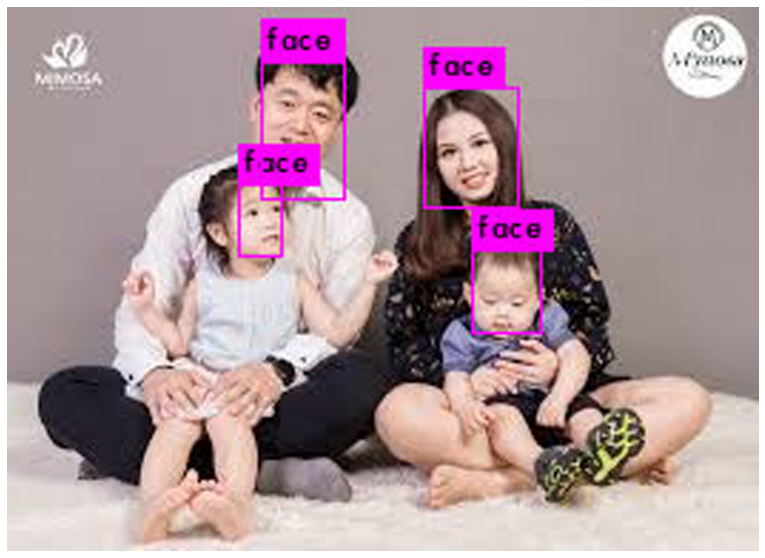

In [ ]:
#show image after training
!./darknet detector test /content/gdrive/My\ Drive/darknet/obj.data.txt /content/gdrive/My\ Drive/darknet/cfg/yolov3.cfg /content/gdrive/My\ Drive/darknet/backup/yolov3_last.weights /content/taixuong.jpg -dont-show
imShow('predictions.jpg')

In [ ]:
%cd /content
!git clone https://github.com/theAIGuysCode/yolo-v3.git

/content
Cloning into 'yolo-v3'...
remote: Enumerating objects: 188, done.
remote: Total 188 (delta 0), reused 0 (delta 0), pack-reused 188
Receiving objects: 100% (188/188), 66.46 MiB | 46.68 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [ ]:
!pip install -r /content/yolo-v3/requirements.txt

      Successfully uninstalled tensorflow-2.2.0


In [ ]:

!cp -r "/content/gdrive/My Drive/darknet/weights" "/content/yolo-v3"
!cp -r "/content/gdrive/My Drive/darknet/obj.names.txt" "/content/yolo-v3/data/labels"a

In [ ]:
!python /content/yolo-v3/load_weights.py

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
2020-06-03 04:46:23.284282: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-06-03 04:46:23.287572: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2020-06-03 04:46:23.287847: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x248cbc0 executing computations on platform Host. Devices:
2020-06-03 04:46:23.287880: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version
Model has been saved successfully.


In [ ]:
!cp -r "/content/weights" "/content/gdrive/My Drive/darknet/weights"

In [ ]:
!python /content/yolo-v3/detect.py images 0.5 0.5 /content/taixuong.jpg

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
2020-06-03 04:53:14.229371: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-06-03 04:53:14.232807: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2020-06-03 04:53:14.232982: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1fa0bc0 executing computations on platform Host. Devices:
2020-06-03 04:53:14.233012: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version
Traceback (most recent call last):
  File "/content/yolo-v3/detect.py", line 146, in <module>
    main(sys.argv[1], float(sys.argv

In [ ]:
!python /content/yolo-v3/detect.py images 0.5 0.5 /content/yolo-v3/data/images/office.jpg

2020-06-03 09:01:45.316591: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
2020-06-03 09:01:51.185214: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-03 09:01:51.188700: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-06-03 09:01:51.189517: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 